In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Загрузка данных
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Создание D1 (без целевого признака)
D1 = df.iloc[:, :4]  # Первые 4 признака
print("D1 (исходные данные):\n", D1.head())

D1 (исходные данные):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [6]:
from sklearn.decomposition import PCA

# Снижение до 2 компонент
pca = PCA(n_components=2)
D2 = pca.fit_transform(D1)
print("\nD2 (PCA):\n", D2[:5])


D2 (PCA):
 [[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


In [3]:
from sklearn.manifold import TSNE

# Снижение до 2 компонент
tsne = TSNE(n_components=2, random_state=42)
D3 = tsne.fit_transform(D1)
print("\nD3 (t-SNE):\n", D3[:5])


D3 (t-SNE):
 [[-23.58093     -0.52206016]
 [-26.291704    -1.0936959 ]
 [-26.193335     0.05305718]
 [-26.638256    -0.32169643]
 [-23.545013    -0.9413765 ]]


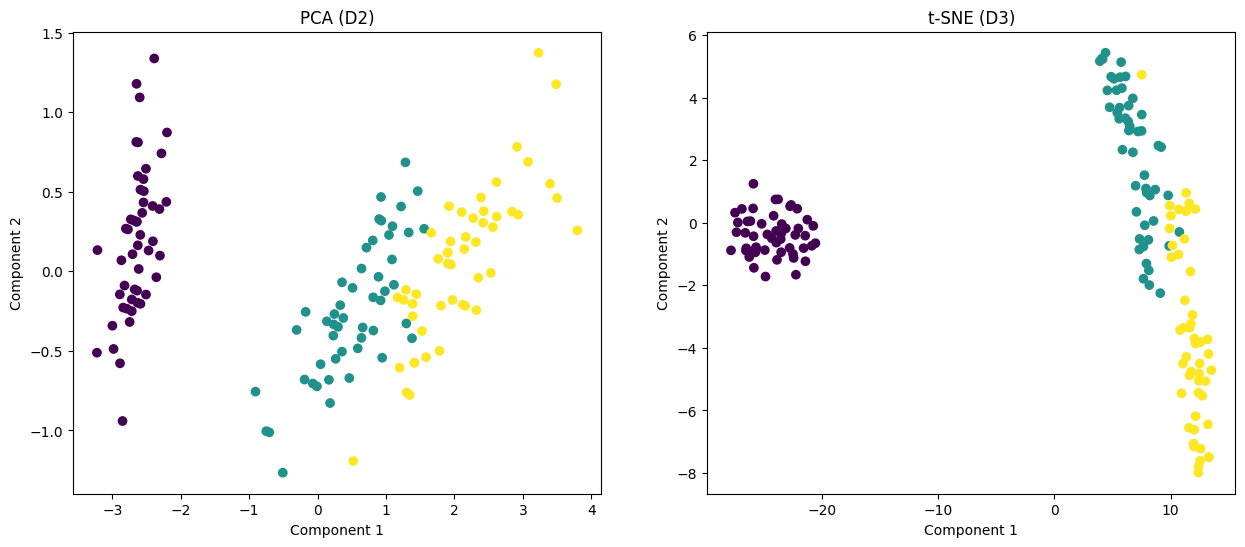

In [4]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Визуализация PCA
ax1.scatter(D2[:, 0], D2[:, 1], c=data.target)
ax1.set_title('PCA (D2)')
ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')

# Визуализация t-SNE
ax2.scatter(D3[:, 0], D3[:, 1], c=data.target)
ax2.set_title('t-SNE (D3)')
ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')

plt.show()

In [5]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score

methods = {
    "K-Means": KMeans(n_clusters=3),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "Агломеративная": AgglomerativeClustering(n_clusters=3)
}

datasets = {"D1": D1, "D2": D2, "D3": D3}

for d_name, d_data in datasets.items():
    print(f"\nКластеризация для {d_name}:")
    for m_name, model in methods.items():
        labels = model.fit_predict(d_data)
        
        # Оценка качества
        sil = silhouette_score(d_data, labels)
        ch = calinski_harabasz_score(d_data, labels)
        
        print(f"{m_name}: Silhouette={sil:.2f}, Calinski-Harabasz={ch:.2f}")


Кластеризация для D1:
K-Means: Silhouette=0.55, Calinski-Harabasz=561.63
DBSCAN: Silhouette=0.49, Calinski-Harabasz=220.30


c:\Users\kanae\Desktop\Study\6_sem\ТМО\add_labs\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Агломеративная: Silhouette=0.55, Calinski-Harabasz=558.06

Кластеризация для D2:
K-Means: Silhouette=0.60, Calinski-Harabasz=693.71
DBSCAN: Silhouette=0.58, Calinski-Harabasz=277.96
Агломеративная: Silhouette=0.60, Calinski-Harabasz=688.62

Кластеризация для D3:
K-Means: Silhouette=0.69, Calinski-Harabasz=3047.96
DBSCAN: Silhouette=-0.50, Calinski-Harabasz=11.42
Агломеративная: Silhouette=0.69, Calinski-Harabasz=3044.67


c:\Users\kanae\Desktop\Study\6_sem\ТМО\add_labs\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kanae\Desktop\Study\6_sem\ТМО\add_labs\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
